In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
X_train[0][0].shape

(32, 3)

In [7]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

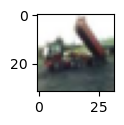

In [8]:
plot_sample(2)

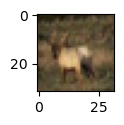

In [9]:
plot_sample(3)

In [10]:
y_train[3].shape

(1,)

In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]

In [12]:
y_train[3][0]

4

In [13]:
classes[y_train[3][0]]

'deer'

In [14]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [15]:
#one hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

y_train_categorical[0:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
32*32*3

3072

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(300,activation='relu'),
    #keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)



Epoch 1/50


1563/1563 [==============================] - 12s 7ms/step - loss: 1.8743 - accuracy: 0.3325
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6996 - accuracy: 0.4039
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6238 - accuracy: 0.4288
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5707 - accuracy: 0.4513
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5296 - accuracy: 0.4630
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4961 - accuracy: 0.4743
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4655 - accuracy: 0.4878
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4387 - accuracy: 0.4978
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4156 - accuracy: 0.5064
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step

In [19]:
classes [np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 4ms/step


'ship'

In [20]:
classes[y_test[1][0]]

'ship'

In [21]:
def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(300,activation='relu'),
    #keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])
    model.compile(optimizer='SGD',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
    return model

In [22]:
#%%timeit -n1 -r1
#calculate time of cell 

In [23]:
model = keras.Sequential([
    
    #cnn
    keras.layers.Conv2D(filters=32, padding='same', kernel_size=(3,3),  activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=32, padding='same', kernel_size=(3,3),  activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    #keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.5148 - accuracy: 0.4558
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1378 - accuracy: 0.5997
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0040 - accuracy: 0.6476
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9221 - accuracy: 0.6760
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8685 - accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8233 - accuracy: 0.7122
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7839 - accuracy: 0.7246
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7502 - accuracy: 0.7387
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7170 - accuracy: 0.7512
Epoch 10/10
1563/1563 [==============================] - 26s 17

In [24]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 3s 8ms/step - loss: 0.9099 - accuracy: 0.6934


[0.90985506772995, 0.6934000253677368]

In [31]:
classes [np.argmax(model.predict(X_test_scaled)[3])]

313/313 [==============================] - 2s 7ms/step


'airplane'

In [26]:
#keras.layers.Conv2D(16,3,padding='same',activation='relu')
#tf.keras.layers.Conv2D(
#    filters,kernel_size,strides=(1,1),padding='valid',data_format=None,
#)

In [32]:
classes[y_test[3][0]]

'airplane'